In [ ]:
using Revise, RangeEnclosures

## Add support for polynomials as the input

In [ ]:
using DynamicPolynomials, IntervalArithmetic

@polyvar x y

In [ ]:
box = IntervalBox(-1..1, 2)

In [ ]:
p = x^2 + 2y^2 + 3x*y

In [ ]:
p([1, 2])

In [ ]:
p(box...)

In [ ]:
enclose(p, box)

In [ ]:
@test enclose(p, box) ≈ Interval(-3.0, 6.0)

In [ ]:

p = x^2 + 2y^2 + 3x*y
println(p([1,2]))   # 15
println(p(box))     # MethodError: no method matching (::Polynomial{true,Int64})(::IntervalBox{2,Float64})

In [ ]:
using RangeEnclosures


f(x) = (x - 0.2)*(x - 0.8)

int = 0..1

enclose(f, int)  # [-0.640001, 0.160001]

In [ ]:
using Plots

In [ ]:
plot(f, xlims=(0, 1))

In [ ]:
enclose(f, int)
bisect(int)

In [ ]:
using 

## Range using taylor models

In [ ]:
using TaylorModels

int = -1.0..1.0
x0 = mid(int)
f(x) = 3x^2 + 2x + 5
tm = TaylorModel1(1, x0, int)
ftm = f(tm)
left = ftm.pol(int.lo - x0) + ftm.rem
right = ftm.pol(int.hi - x0) + ftm.rem
bounds = union(left,right)
lower_bound = inf(bounds)
upper_bound = sup(bounds)

In [ ]:
lower_bound, upper_bound

In [ ]:
enclose(f, int, :TaylorModels)

In [ ]:
enclose(x -> x^2-2x+1, -1..1, :BranchAndBound)

## Using Branch and Prune

In [ ]:
using BranchAndPrune, DynamicPolynomials, Plots
using Revise, RangeEnclosures

In [ ]:
f(x) = (x - 0.2)*(x - 0.8)
int = 0..1
enclose(f, int)

In [ ]:
plot(f, xlims=(0, 1))

In [ ]:
plot(x -> 0.0)

In [ ]:
struct MonotoneSearch <: AbstractDepthFirstSearch{Interval{Float64}}
    f::Function
    initial::Interval
    tol::Float64
    algorithm::Symbol
end

# multivariate case

#=
struct MonotoneSearch{N} <: AbstractDepthFirstSearch{IntervalBox{N, Float64}}
    f::Function
    initial::IntervalBox{N, Float64}
    tol::Float64
    algorithm::Symbol=:IntervalArithmetic
end
=#

In [ ]:
struct MonotoneSearchND{N} <: AbstractDepthFirstSearch{IntervalBox{N, Float64}}
    f::Function
    initial::IntervalBox{N, Float64}
    tol::Float64
    algorithm::Symbol
end

In [ ]:
function BranchAndPrune.process(search::MonotoneSearch, interval)
    y = enclose(search.f, interval, search.algorithm)

    if is_monotonic(y) # sign doesn't change
        return :store, interval
    elseif diam(y) < search.tol
        return :discard, interval
    else
        return :bisect, interval
    end
end

In [ ]:
BranchAndPrune.bisect(::MonotoneSearch, interval) = bisect(interval)

is_monotonic(x::Interval) = inf(x)*sup(x) > 0

In [ ]:
# tol = 1/256
#alg = :IntervalArithmetic
#search = MonotoneSearch(f, int, tol, alg)
#postsearch = ZeroSearch(region, IB, tol/2)

In [ ]:
function run_search(f, interval; tol=1/256, alg=:IntervalArithmetic)
    search = MonotoneSearch(f, interval, tol, alg)

    local endtree = nothing

    for working_tree in search
        endtree = working_tree
    end

    return endtree
end

In [ ]:
tree = run_search(f, int)

In [ ]:
all(is_monotonic(enclose(f, x)) for x in data(tree))

In [ ]:
length(data(tree))

In [ ]:
is_monotonic(enclose(f, int))

In [ ]:
for x in data(tree_outer)
    y = enclose(f, x)
    println(is_monotonic(y))
end

In [ ]:
union(data(tree_outer)[1], data(tree_outer)[2])

In [ ]:
data(tree_outer)[1]

In [ ]:
data(tree_outer)[2]

In [ ]:
setdiff(int, data(tree_outer)[1])

In [ ]:
data(tree_outer)

### Multivariate case

In [ ]:
@polyvar x y
box = IntervalBox(-1..1,2)

p = x^2 + 2y^2 + 3x*y

In [ ]:
using MultivariatePolynomials

In [ ]:
@which enclose(p, box, :SumOfSquares)

In [ ]:
f(x...) = p(variables(p) => x)

In [ ]:
enclose(f, box)

In [ ]:
function f(p::AbstractPolynomialLike, x)
    return p(variables(p) => x)
end

In [ ]:
f(p, (1.0, 2.0))

In [ ]:
subs(p, x=>1.0, y=>2.0)

----

In [ ]:
using IntervalArithmetic

In [ ]:
dom = IntervalBox(-10..10, 2)

In [ ]:
f(a, b) = a + b * b

In [ ]:
f(dom...)

In [ ]:
using DynamicPolynomials

@polyvar x y

In [ ]:
h = x + y * y

In [ ]:
hf(a) = h(variables(h) => a)
hf(a...) = h(variables(h) => a)

In [ ]:
using IntervalArithmetic

In [ ]:
dom = IntervalBox(-10 .. 10, 2)

In [ ]:
hf(dom...)

In [ ]:
hf(dom[1], dom[2])

In [ ]:
tf = (t1, t2) -> (t1 + t2 * t2)
tf(dom...)

In [ ]:
Interval(-10, 10) + Interval(-10, 10) * Interval(-10, 10)

In [ ]:
function my_func(vars...)
    returnh(variables(h) => (1.0, 2.0))

In [ ]:
w(z) = h(variables(h) => z)

In [ ]:
h(variables(h) => (1.2, 0.4))

In [ ]:
f(1.2, 0.4)

In [ ]:
fh(1.0, 0.0)

In [ ]:
f.(dom...)

In [ ]:
g(x, y) = (x + 2y - 7)^2 + (2x + y - 5)^2

res = enclose(g, dom, :IntervalArithmetic)

In [ ]:
@polyvar x y
p = (x + 2y - 7)^2 + (2x + y - 5)^2
res = enclose(p, dom, :IntervalArithmetic)

In [ ]:
f(x, y) = 5*x*x + 8*x*y + 5*y*y - 34*x - 38*y + 74

In [ ]:
res = enclose(f, dom, :IntervalArithmetic)

In [ ]:
enclose((a, b) -> b*b, dom)

In [ ]:
enclose(x + y*y, dom)

In [ ]:
h(x...) = p(variables(p) => x)

In [ ]:
enclose(h, dom)

In [ ]:
@testset "Multivariate example from the Quickstart Guide" begin
    g(x, y) = (x + 2y - 7)^2 + (2x + y - 5)^2
    dom = IntervalBox(-10..10, 2)

    x = enclose(g, dom, :IntervalArithmetic)
    xref = Interval(0, 2594)
    r = relative_precision(x, xref)
    @test inf(r) ≤ 1e-5 && sup(r) ≤ 1e-5
end

@testset "Test multivariate polynomial input" begin
    @polyvar x y
    p = (x + 2y - 7)^2 + (2x + y - 5)^2
    dom = IntervalBox(-10..10, 2)

    x = enclose(p, dom)
    xref = Interval(-1446, 2594)
    r = relative_precision(x, xref)
    @test inf(r) ≤ 1e-5 && sup(r) ≤ 1e-5
    # Note: DynamicPolynomials automatically expands p, and evaluation using
    # interval arithmetic gives a worser left bound than the factored expression.
end


## Branch and bound to estimate the range

Idea:

-Se dan como entrada una funcion y una region de busqueda. Para simplificar, consideremos el caso unidimensinoal en primer lugar.

- En el objeto de busqueda, guardo el maximo y minimo encontrados hasta el momento.

- Descarto aquellos intervalos tales que:
    - cuyo valor infimo es mayor que el minimo obtenido hasta hora,
    - cuyo valor maximo es menor que el maximo obtenido hasta ahora

In [1]:
using BranchAndPrune, DynamicPolynomials, Plots
using Revise, RangeEnclosures

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/DynamicPolynomials/tepBk.ji for DynamicPolynomials [7c1d4256-1411-5781-91ec-d7bc3513ac07]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/Revise/M1Qoh.ji for Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/RangeEnclosures/kxbI0.ji for RangeEnclosures [1b4d18b6-9e5d-11e9-236c-f792b01831f8]
└ @ Base loading.jl:1240


In [4]:
struct RangeBound1DSearch{T} <: AbstractDepthFirstSearch{Interval{T}}
    f::Function
    initial::Interval{T}
    tol::T
    algorithm::Symbol
    infimum::T # mejor cota inferior hasta ahora
    supremum::T # mejor cota superior hasta ahora
end

In [3]:
function BranchAndPrune.process(search::RangeBound1DSearch, interval)
    y = enclose(search.f, interval, search.algorithm)

    if inf(y) > search.infimum # mejoro la cota inferior
        return :store, interval
    elseif sup(y) < search.supremum # mejoro la cota superior
        return :store, interval
    elseif inf(y) > search.infimum && sup(y)
        diam(y) < search.tol
        return :discard, interval
    else
        return :bisect, interval
    end
end

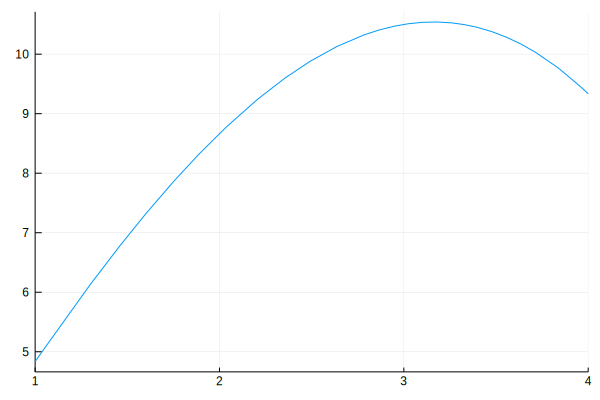

In [11]:
f(x) = -x^3/6 + 5x

dom = Interval(1, 4)

plot(f, xlims = (1, 4), lab="")

In [12]:
enclose(f, 1 .. 4)

[-5.66667, 19.8334]

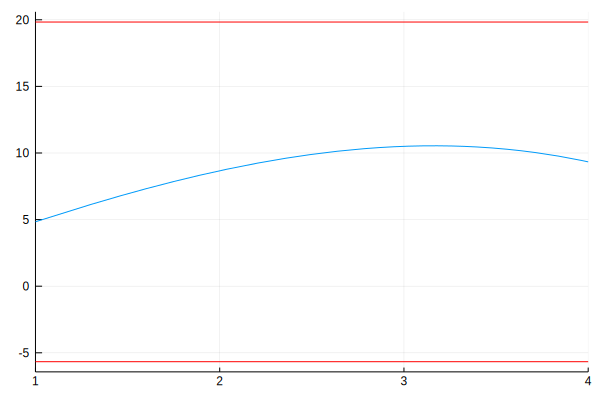

In [13]:
plot!(x -> -5.66667, color="red", lab="")
plot!(x -> 19.8334, color="red", lab="")

In [15]:
dom = 1 .. 4
x = bisect(dom)

([1, 2.48829], [2.48828, 4])

In [17]:
enclose(f, x[1])

[2.43228, 12.2748]

In [18]:
enclose(f, x[2])

[1.77473, 17.4323]

In [33]:
e = enclose.(f, x)

([2.43228, 12.2748], [1.77473, 17.4323])

In [34]:
union(e[1], e[2])

[1.77473, 17.4323]

In [35]:
# SPLATTING
union(e...)

[1.77473, 17.4323]

In [28]:
typeof(ans)

Tuple{Interval{Float64},Interval{Float64}}

In [21]:
union(enclose(f, x[1]), enclose(f, x[2]))

[1.77473, 17.4323]

In [66]:
function enclose_binary(f, dom; kmax=3, tol=1e-3)
    y = enclose(f, dom)
    yinf, ysup = inf(y), sup(y)

    x = bisect(dom)
    ynew = union(enclose.(f, x)...)

    ynew_inf, ynew_sup = inf(ynew), sup(ynew)

    no_cambia_inf = abs(yinf - ynew_inf) < tol
    no_cambia_sup = abs(ysup - ynew_sup) < tol
    no_cambia_ninguno = (no_cambia_inf && no_cambia_sup)

    empeora_inf = ynew_inf < yinf
    empeora_sup = ynew_sup > ysup
    empeoran_ambos = empeora_inf && empeora_sup

    if kmax == 0 || no_cambia_ninguno || empeoran_ambos
        return Interval(yinf, ysup)
    end

    yinf = max(yinf, ynew_inf) # mejoro al ysup
    ysup = min(ysup, ynew_sup)  # mejoro al ysup

    e1 = enclose_binary(f, x[1], kmax=kmax-1)
    e2 = enclose_binary(f, x[2], kmax=kmax-1)
    return Interval(max(inf(e1), inf(e2)), min(sup(e1), sup(e2)))
end

enclose_binary (generic function with 1 method)

In [67]:
enclose_binary(f, dom)

[8.64219, 6.66474]

In [ ]:
function enclose_binary(f, dom; kmax=3, tol=1e-3)
    y = enclose(f, dom)
    yinf, ysup = inf(y), sup(y)

    x = bisect(dom)
    ynew = union(enclose.(f, x)...)

    ynew_inf, ynew_sup = inf(ynew), sup(ynew)

    no_cambia_inf = abs(yinf - ynew_inf) < tol
    no_cambia_sup = abs(ysup - ynew_sup) < tol
    no_cambia_ninguno = (no_cambia_inf && no_cambia_sup)

    empeora_inf = ynew_inf < yinf
    empeora_sup = ynew_sup > ysup
    empeoran_ambos = empeora_inf && empeora_sup

    if kmax == 0 || no_cambia_ninguno || empeoran_ambos
        return Interval(yinf, ysup)
    end

    yinf = max(yinf, ynew_inf) # mejoro al ysup
    ysup = min(ysup, ynew_sup)  # mejoro al ysup

    e1 = enclose_binary(f, x[1], kmax=kmax-1)
    e2 = enclose_binary(f, x[2], kmax=kmax-1)
    return Interval(max(inf(e1), inf(e2)), min(sup(e1), sup(e2)))
end

In [ ]:
function max_binary(f, dom; maxiter=3, tol=1e-3)
    y = enclose(f, dom)
    ysup = sup(y)
    
    k = 0
    while k < maxiter
        x = bisect(dom)
        ynew_left = enclose(f, x[1])
        ynew_right = enclose(f, x[2])
        ynew_best = min(sup(ynew_left), sup(ynew_right))

        # no mejoro
        abs(ysup - ynew_best) < tol && break
        
        
    end
    return ysup
end

In [ ]:
BranchAndPrune.bisect(::MonotoneSearch, interval) = bisect(interval)

is_monotonic(x::Interval) = inf(x)*sup(x) > 0

In [ ]:
function run_search(f, interval; tol=1/256, alg=:IntervalArithmetic)
    search = MonotoneSearch(f, interval, tol, alg)

    local endtree = nothing

    for working_tree in search
        endtree = working_tree
    end

    return endtree
end

In [ ]:
tree = run_search(f, int)

## Modeling toolkit

In [6]:
using ModelingToolkit

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/ModelingToolkit/Qmdqu.ji for ModelingToolkit [961ee093-0014-501f-94e3-6117800e7a78]
└ @ Base loading.jl:1240


In [7]:
@variables x y

(x, y)

In [15]:
expr = (x ≥ 0) & (x + y <= 1)

((0 < x) | (0 == x)) & ((x + y < 1) | (x + y == 1))

In [25]:
@variables x[1:10]

(Operation[x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀],)

In [34]:
expr = x[1] * x[2] - x[2]*x[1]

x₁ * x₂ - x₂ * x₁

In [35]:
simplified_expr(expr)

:(x₁ * x₂ - x₂ * x₁)

In [39]:
?simplified_expr

search: simplified_expr



No documentation found.

`ModelingToolkit.simplified_expr` is a `Function`.

```
# 3 methods for generic function "simplified_expr":
[1] simplified_expr(eq::Equation) in ModelingToolkit at /home/mforets/.julia/packages/ModelingToolkit/jCiX6/src/direct.jl:33
[2] simplified_expr(c::ModelingToolkit.Constant) in ModelingToolkit at /home/mforets/.julia/packages/ModelingToolkit/jCiX6/src/direct.jl:29
[3] simplified_expr(O::Operation) in ModelingToolkit at /home/mforets/.julia/packages/ModelingToolkit/jCiX6/src/direct.jl:17
```


## TaylorSeries tests

In [4]:
using TaylorSeries, Test

const order = 20
const x, y, z, w = set_variables(Int128, "x", numvars=4, order=2order)

function fateman1(degree::Int)
    T = Int128
    oneH = convert(HomogeneousPolynomial{T},1)#HomogeneousPolynomial(one(T), 0)
    # s = 1 + x + y + z + w
    s = TaylorN( [oneH, HomogeneousPolynomial([one(T),one(T),one(T),one(T)],1)], degree )
    s = s^degree
    # s is converted to order 2*ndeg
    s = TaylorN(s.coeffs, 2*degree)

    s * ( s+1 )
end

function fateman2(degree::Int)
    T = Int128
    oneH = convert(HomogeneousPolynomial{T},1)#HomogeneousPolynomial(one(T), 0)
    # s = 1 + x + y + z + w
    s = TaylorN( [oneH, HomogeneousPolynomial([one(T),one(T),one(T),one(T)],1)], degree )
    s = s^degree
    # s is converted to order 2*ndeg
    s = TaylorN(s.coeffs, 2*degree)
    return s^2 + s
end

function fateman3(degree::Int)
    s = x + y + z + w + 1
    s = s^degree
    s * (s+1)
end

function fateman4(degree::Int)
    s = x + y + z + w + 1
    s = s^degree
    s^2 + s
end

function run_fateman(N)
    results = Any[]
    nn = 5
    for f in (fateman1, fateman2, fateman3, fateman4)
        f(0)
        println("Running $f")
        @time result = f(N)
        # push!(results, result) # This may take a lot of memory
        t = Inf
        tav = 0.0
        for i = 1:nn
            ti = @elapsed f(N)
            tav += ti
            t = min(t,ti)
        end
        println("\tAverage time of $nn runs: ", tav/nn)
        println("\tMinimum time of $nn runs: ", t)
    end
    results
end


println("Running Fateman with order $order...")

results = run_fateman(order)

println("Done.")

# @assert results[1] == results[2] == results[3] == results[4]

Running Fateman with order 20...


Running fateman1
  2.291712 seconds (1.62 k allocations: 18.456 MiB, 0.25% gc time)
	Average time of 5 runs: 2.1707496014
	Minimum time of 5 runs: 2.040555202
Running fateman2
  1.055866 seconds (1.35 k allocations: 14.296 MiB, 0.18% gc time)
	Average time of 5 runs: 1.090959429
	Minimum time of 5 runs: 1.029898807
Running fateman3
  2.210042 seconds (3.64 k allocations: 64.430 MiB, 0.15% gc time)
	Average time of 5 runs: 2.1546272096
	Minimum time of 5 runs: 2.053515894
Running fateman4
  1.277975 seconds (3.37 k allocations: 60.269 MiB, 0.15% gc time)
	Average time of 5 runs: 1.084736899
	Minimum time of 5 runs: 1.045711443
Done.


In [3]:
results

0-element Array{Any,1}

In [2]:
@assert results[1] == results[2] == results[3] == results[4]

BoundsError: BoundsError: attempt to access 0-element Array{Any,1} at index [2]

In [1]:
pos(x) = x < 0 ? 0 : x

pos (generic function with 1 method)

In [2]:
@code_warntype pos(1.0)

Variables
  #self#::Core.Compiler.Const(pos, false)
  x::Float64

Body::Union{Float64, Int64}
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─      return 0
3 ─      return x


In [3]:
pos_stable(x) = x < 0 ? zero(x) : x

pos_stable (generic function with 1 method)

In [4]:
@code_warntype pos_stable(1.0)

Variables
  #self#::Core.Compiler.Const(pos_stable, false)
  x::Float64

Body::Float64
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─ %3 = Main.zero(x)::Core.Compiler.Const(0.0, false)
└──      return %3
3 ─      return x


In [12]:
f(x, y) = x + y - 1.0

@code_warntype f(1.0, 2.0)

Variables
  #self#::Core.Compiler.Const(f, false)
  x::Float64
  y::Float64

Body::Float64
1 ─ %1 = (x + y)::Float64
│   %2 = (%1 - 1.0)::Float64
└──      return %2


In [13]:
using BenchmarkTools

In [14]:
x = [rand() for _ in 1:1000];

In [22]:
# g(x) = [pos(xi) for xi in x]; # pos.(x)
g(x) = pos.(x)

g (generic function with 1 method)

In [23]:
@btime g($x);

  1.300 μs (6 allocations: 8.05 KiB)


In [24]:
#g_stable(x) = [pos_stable(xi) for xi in x]; # pos_stable.(x)
g_stable(x) = pos_stable.(x)

g_stable (generic function with 1 method)

In [25]:
@btime g_stable($x);

  423.056 ns (1 allocation: 7.94 KiB)
